In [1]:
from ml4floods.visualization.plot_utils import plot_s2_swirnirred_image, plot_s2_and_confusions
import os
import sys 
import fsspec
sys.path.append(r'C:\Users\1\Documents\Projectes\Floods\scripts')
from ml4floods.visualization.plot_utils import plot_s2_swirnirred_image, get_image_transform
from plot_s2_and_preds import compute_positives, get_s2_swirnirred_image, plot_s2_and_pred
import matplotlib.pyplot as plt 
from matplotlib import colors
from ml4floods.models.utils.metrics import convert_targets_to_v1, compute_positives
import torch
import rasterio.plot as rasterioplot
import numpy as np

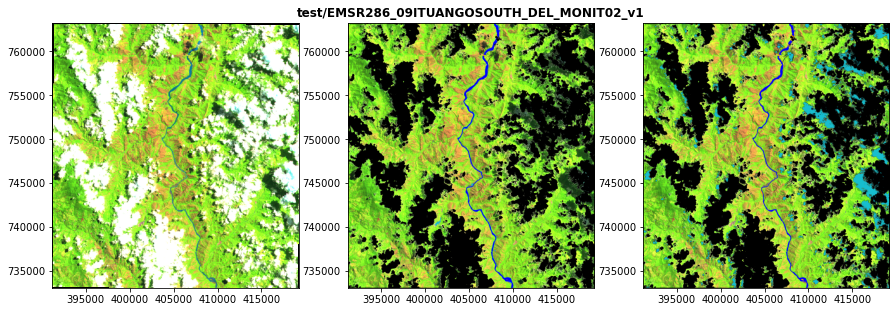

In [2]:
files = [f.split(".geojson")[0] for f in os.listdir(r'X:\media\disk\databases\WORLDFLOODS\2_Mart\worldfloods_extra_v2_0_NEW\test\floodmaps')+
         os.listdir(r'X:\media\disk\databases\WORLDFLOODS\2_Mart\worldfloods_extra_v2_0_NEW\val\floodmaps')]
files = ['EMSR286_09ITUANGOSOUTH_DEL_MONIT02_v1']

path_file = r'X:\media\disk\databases\WORLDFLOODS\2_Mart\worldfloods_extra_v2_0_NEW'

fs = fsspec.filesystem("")

for file in files:
    gt_file = fs.glob(path_file+rf'/*/gt/*{file}.tif')[0]
    s2_file = gt_file.replace("gt","S2")
    #image = get_image_transform(s2_file)[0]
    s2split = s2_file.split("/")
    title = f"{s2split[-3]}/{s2split[-1].replace('.tif','')}"

    ground_truth, transform = get_image_transform(gt_file)
    ground_truth = torch.from_numpy(ground_truth).unsqueeze(0)
    pred_MNDWI = get_image_transform(rf'X:\home\kike\Projectes\ml4floods\Predictions_models\MNDWI\{file}.tif')[0]
    pred_Unet = get_image_transform(rf'X:\home\kike\Projectes\ml4floods\Predictions_models\WFV1_unet\{file}.tif')[0]
    
    pred_MNDWI = torch.from_numpy(pred_MNDWI)
    pred_Unet = torch.from_numpy(pred_Unet)
    positives_mndwi = compute_positives(ground_truth, pred_MNDWI).detach().numpy()
    positives_Unet = compute_positives(ground_truth, pred_Unet).detach().numpy()

    fig, ax = plt.subplots(1,3, figsize=(15,25))
    plot_s2_swirnirred_image(s2_file, size_read = 600,ax = ax[0])
    plot_s2_and_confusions(s2_file,positives_Unet,title = title, transform = transform, ax = ax[1])
    plot_s2_and_confusions(s2_file,positives_mndwi, transform = transform, ax = ax[2])
    plt.show()